# Intro to R
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

As a demo of the language, plot sin and cos on the same axis:

In [1]:
# set up the default plot height and width (this is just for aesthetics in the jupyter notebook, you won't need it in RStudio)
library('repr')
options(repr.plot.width=6, repr.plot.height=5)

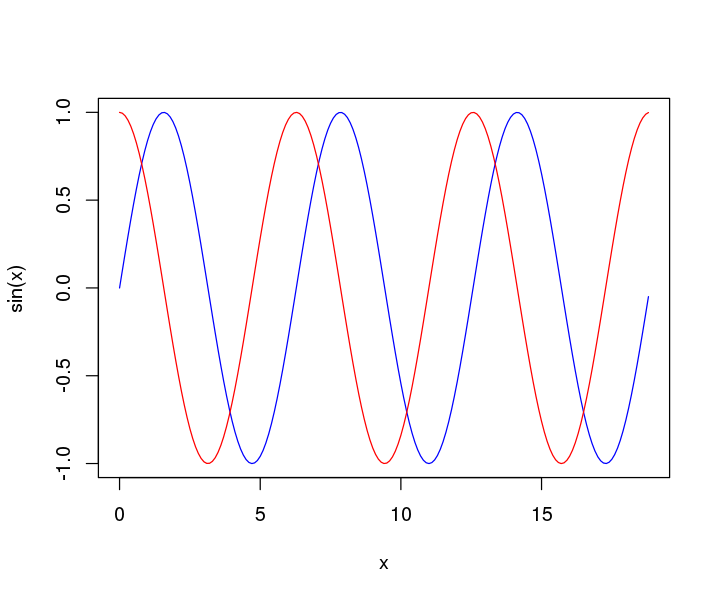

In [2]:
# define a sequence of points (start, end, by)
x = seq(0, 6*pi, 0.1)

# plot the sin of these points
plot(x, sin(x), type="l", col="blue")

# add a cos line to the plot
lines(x, cos(x), col="red")

# NetCDF
<div style="float: right;">[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)</div>

The easiest way to load and analyze NetCDF data in R involves the [ncdf4 package](https://cran.r-project.org/web/packages/ncdf4/ncdf4.pdf "ncdf4 Docs"). If you know the url of the dataset that you are interested in, you can display the info about that datset using **nc_open(data_url)** and then printing the outcome. To work with the file, we will assign that dataset to a name -in this example we will use **nc**. 

In [16]:
library('ncdf4')

data_url <- 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc'
variable <- 'AirTC_Avg'

nc <- nc_open(data_url)

If you want to check out the names of the variables in this NetCDF file, you can run:

In [17]:
names(nc$var)

[1] "AirTC_2_Avg"             "AirTC_Avg"              
 [3] "Albedo_1_Avg"            "Albedo_Avg"             
 [5] "CmCIR_Avg"               "CmGIR_Avg"              
 [7] "DnTot_Avg"               "IR01DnCo_Avg"           
 [9] "IR01Dn_Avg"              "IR01UpCo_Avg"           
[11] "IR01Up_Avg"              "LPO2Dn_Avg"             
[13] "Max_Run_Tot_mm_24hr_Max" "Max_Run_Tot_mm_2hr_Max" 
[15] "NR01TC_Avg"              "NR01TK_Avg"             
[17] "NetRl_Avg"               "NetRs_Avg"              
[19] "NetTot_Avg"              "PA_uS"                  
[21] "PA_uS_2"                 "PA_uS_3"                
[23] "PA_uS_4"                 "RECORD"                 
[25] "RH"                      "RHCroof"                
[27] "RH_2"                    "Rain_mm_2_Tot"          
[29] "Rain_mm_3600_Tot"        "Rain_mm_3_Tot"          
[31] "Rain_mm_Tot"             "SBT_C_2_Avg"            
[33] "SBT_C_Avg"               "SR01Dn_Avg"             
[35] "SR01Up_Avg"              "Storm_Type_mm_24hr"     
[37] "Storm_Type_mm_2hr"       "T108_C_Avg_11"          
[39] "T108_C_Avg_12"           "T108_C_Avg_13"          
[41] "T108_C_Avg_14"           "T108_C_Avg_15"          
[43] "T108_C_Avg_16"           "T108_roof10_Avg"        
[45] "T108_roof1_Avg"          "T108_roof2_Avg"         
[47] "T108_roof3_Avg"          "T108_roof4_Avg"         
[49] "T108_roof5_Avg"          "T108_roof6_Avg"         
[51] "T108_roof7_Avg"          "T108_roof8_Avg"         
[53] "T108_roof9_Avg"          "TCAV_1_Avg"             
[55] "TCAV_2_Avg"              "TCAV_3_Avg"             
[57] "TCAV_4_Avg"              "TCroof_Avg"             
[59] "UpTot_Avg"               "VW"                     
[61] "VW_2"                    "VW_3"                   
[63] "VW_4"                    "WindDir_deg"            
[65] "WindDir_std_dev"         "WindSpd_ms"             
[67] "hfp01_10_Avg"            "hfp01_11_Avg"           
[69] "hfp01_12_Avg"            "hfp01_1_Avg"            
[71] "hfp01_2_Avg"             "hfp01_3_Avg"            
[73] "hfp01_4_Avg"             "hfp01_5_Avg"            
[75] "hfp01_6_Avg"             "hfp01_7_Avg"            
[77] "hfp01_8_Avg"             "hfp01_9_Avg"            
[79] "lat"                     "lon"                    
[81] "station_name"

In this example we are first going to take a look at the average air temperature **'AirTC_Avg'**

In [18]:
AirT.data <- ncvar_get(nc, variable)
AirT.units <- ncatt_get(nc, variable, 'units')$value

In [19]:
time.data <- ncvar_get(nc, 'time')
time.units <- ncatt_get(nc, 'time', 'units')$value
print(time.units)

[1] "seconds since 1970-01-01"


In this NetCDF file the time units tell us that time is stored as seconds since 1970-01-01. That time format is often called POSIX time. To convert to a more legible time format, we can use the **as.POSIXct** function. Make sure to specify that the timezone we want to use is UTC, otherwise the function will use your local timezone, which can get confusing.  

In [20]:
# convert the time to a date string
time <- as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

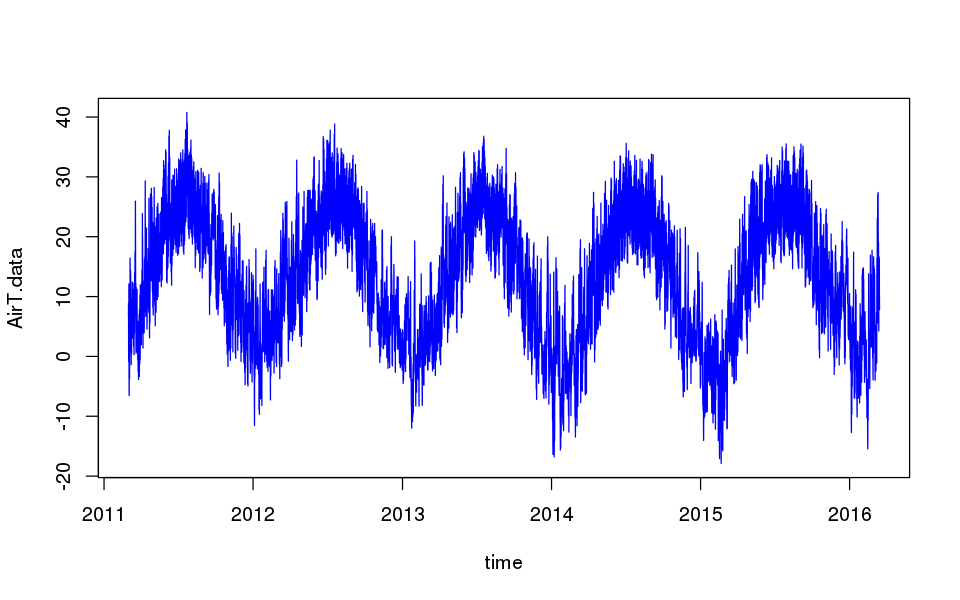

In [21]:
plot(time, AirT.data, type="l", col="blue")

Now you should be familiar with the basics of how to access NetCDF files. To move forward with the next examples make sure that you have run the following commands:

In [ ]:
library('ncdf4')
data_url <- 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc'

nc <- nc_open(data_url)
time.data <- ncvar_get(nc, 'time')
time <- as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

## Time slices
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

We often are more interested in looking at one particular time, rather than the whole record. To avoid loading all of the data, it is best to slice by the index of the time variable. 

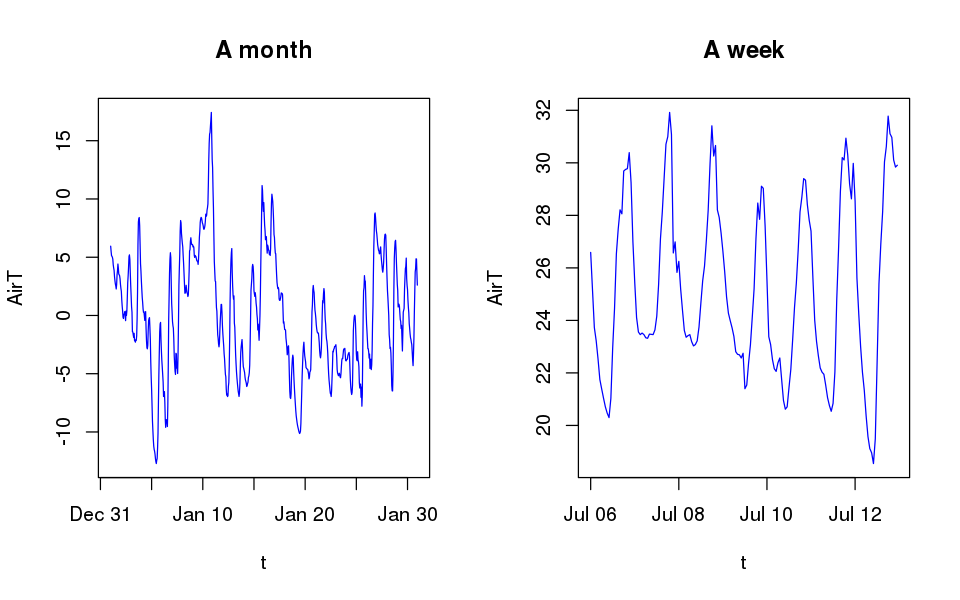

In [22]:
# find numerical indexers using timestamps
start <- which(time=="2016-01-01")
count <- which(time=="2016-01-31") - start

# select a slice using numerical indexers
AirT <- ncvar_get(nc,'AirTC_Avg', start, count)
t <- time[start:(start+count-1)]

# define a dataframe with time as the names of the rows and air temp as the data
a_month <- data.frame(t, AirT)

# do the same for a week
start <- which(time=="2015-07-06 00:00:00")
count <- which(time=="2015-07-13 00:00:00") - start
AirT <- ncvar_get(ds,variable, start, count)
t <- time[start:(start+count-1)]
a_week <- data.frame(t, AirT)

# plot
layout(matrix(1:2, ncol = 2))
with(a_month, plot(AirT~t, type="l", col="blue", main='A month'))
with(a_week, plot(AirT~t, type="l", col="blue", main='A week'))

## Multiple variables
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

We often are more interested in looking at one particular time, rather than the whole record. To avoid loading all of the data, it is best to slice by the index of the time variable. 

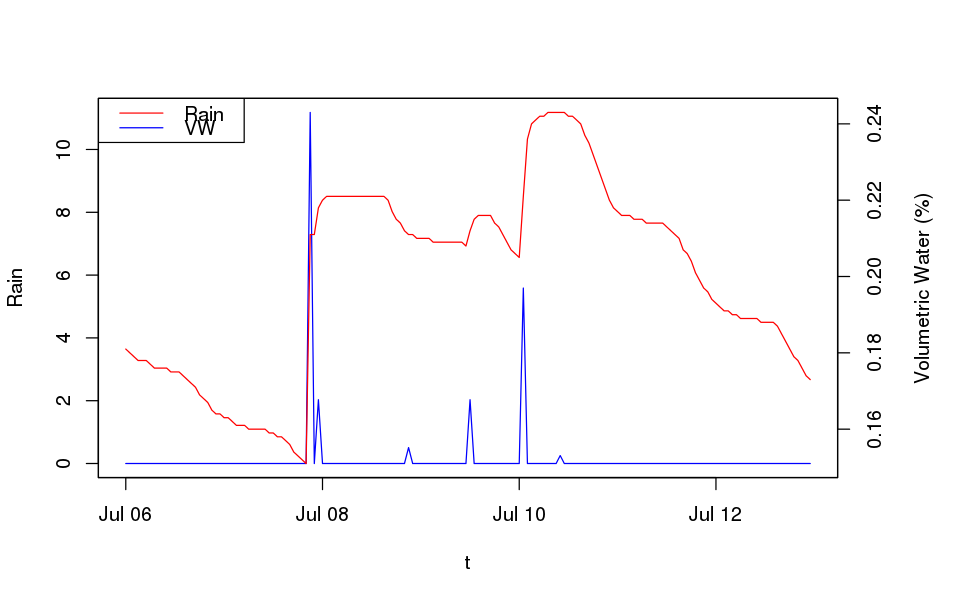

In [25]:
start = which(time=="2015-07-06")
count = which(time=="2015-07-13") - start

Rain = ncvar_get(ds,'Rain_mm_3_Tot', start, count)
VW = ncvar_get(ds,'VW', start, count)
t = time[start:(start+count-1)]

vars_for_a_week = data.frame(t, Rain, VW)

par(mar=c(5,4,4,5)+.1)
with(vars_for_a_week, plot(Rain~t,type="l",col="blue"))
par(new=TRUE)

with(vars_for_a_week, plot(VW~t,type="l",col="red",xaxt="n",yaxt="n",xlab="",ylab=""))
axis(4)
mtext("Volumetric Water (%)",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Rain","VW"))

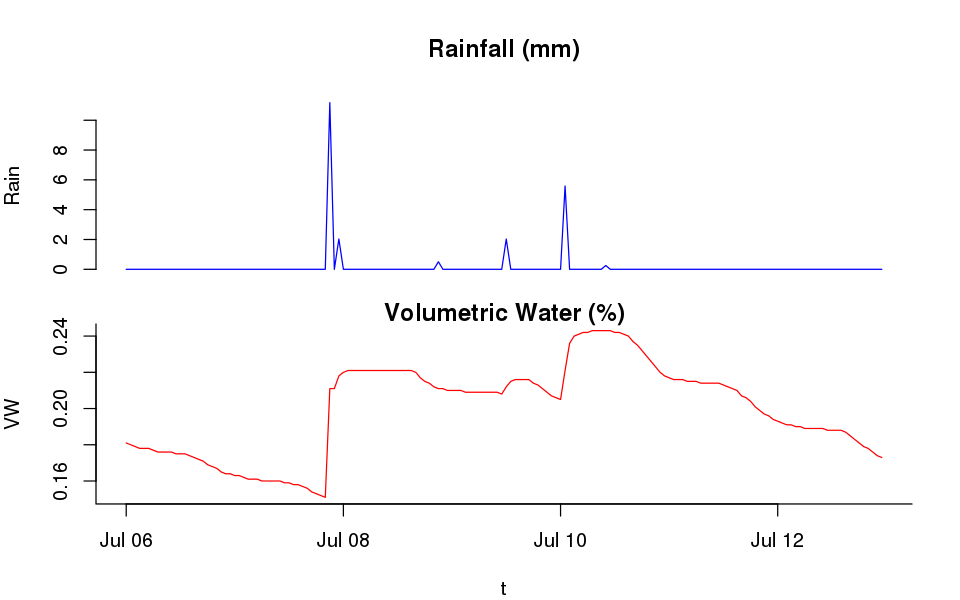

In [13]:
# 2 figures arranged in 2 rows and 1 column
layout(matrix(1:2, ncol = 1))

# set margins (bottom, left, top, right)
par(mar = c(1, 4, 4, 2))
with(vars_for_a_week, plot(Rain~t, type = 'l', col='blue', xaxt = 'n', bty="n", main = 'Rainfall (mm)'))

# set margins (bottom, left, top, right)
par(mar = c(4, 4, 1, 2))
with(vars_for_a_week, plot(VW~t, type = 'l', col='red', bty = "l", main = 'Volumetric Water (%)'))

## Multiple sites
[NetCDF](#Netcdf) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) | [Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

In [147]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/broadmead.nc'

ds = nc_open(data_url)
time.data = ncvar_get(ds, 'time')
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

start = which(time=="2016-02-23 12:00")
count = which(time=="2016-02-26 12:00") - start

Rain1 = ncvar_get(ds,'Rain_1_mm_Tot', start, count)
Rain2 = ncvar_get(ds,'Rain_2_mm_Tot', start, count)
t = time[start:(start+count-1)]
broadmead_rain = data.frame(t, Rain1, Rain2)

nc_close(ds)

In [177]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_up.nc'

ds = nc_open(data_url)
time.data = ncvar_get(ds, 'time')
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

start = which(time=="2016-02-23 12:00")
count = which(time=="2016-02-26 12:00") - start

level = ncvar_get(ds,'Corrected_cm_Avg', start, count)
t = time[start:(start+count-1)]
washington_up_level = data.frame(t, level)

nc_close(ds)

In [178]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_down.nc'

ds = nc_open(data_url)
time.data = ncvar_get(ds, 'time')
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

start = which(time=="2016-02-23 12:00")
count = which(time=="2016-02-26 12:00") - start

level = ncvar_get(ds,'Corrected_cm_Avg', start, count)
t = time[start:(start+count-1)]
washington_down_level = data.frame(t, level)

nc_close(ds)

In [176]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_lake.nc'

ds = nc_open(data_url)
time.data = ncvar_get(ds, 'time')
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

start = which(time=="2016-02-23 12:00")
count = which(time=="2016-02-26 12:00") - start

level = ncvar_get(ds,'Lvl_cm_Avg', start, count)
t = time[start:(start+count-1)]
washington_lake_level = data.frame(t, level)

nc_close(ds)

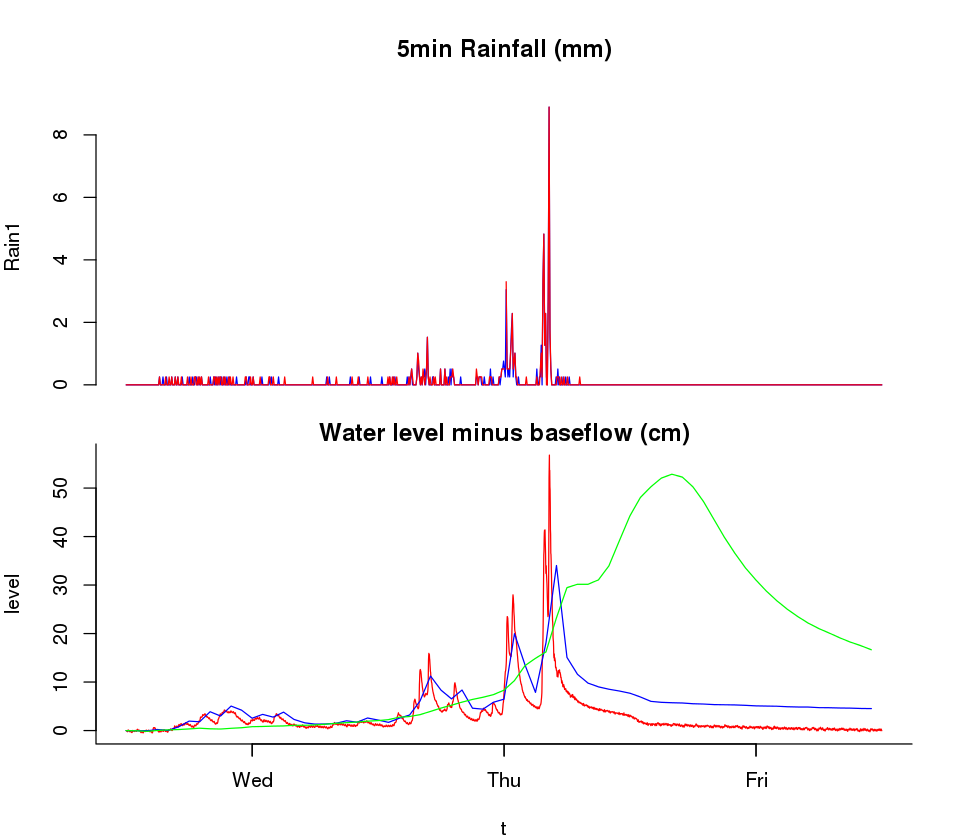

In [179]:
layout(matrix(1:2, ncol = 1))

par(mar = c(1, 4, 4, 2))
with(broadmead_rain, plot(Rain1~t, type = 'l', col='blue', xaxt = 'n', bty="n",main = '5min Rainfall (mm)'))
with(broadmead_rain, lines(Rain2~t, col="red"))

par(mar = c(4, 4, 1, 2))
with((washington_up_level - washington_up_level[1,2]), plot(level~t, type = 'l', col="red", bty = "l", main = 'Water level minus baseflow (cm)'))
with((washington_down_level - washington_down_level[1,2]),lines(level~t, col="blue"))
with((washington_lake_level - washington_lake_level[1,2]),lines(level~t, col="green"))

## Using functions
[NetCDF](#Netcdf) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) | [Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

You might have noticed that the way we pulled data from a multiple datasets was redundant. To simplify this process, we can write a quick function that can be used to pull from any site, any variable and setting your own start and end times. To show how this works, we will do the same exercise that we just did above, but in many fewer lines:

In [218]:
select <- function(site, variable, start.time, end.time){
    library('ncdf4')
    
    data_url = paste0('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/',site,'.nc')

    ds = nc_open(data_url)
    time.data = ncvar_get(ds, 'time')
    time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

    start = which(time==start.time)
    count = which(time==end.time) - start
    var = ncvar_get(ds, variable, start, count)
    t = time[start:(start+count-1)]
    df = data.frame(t, var)
    colnames(df) <- c('t',variable)

    nc_close(ds)
    return(df)
    }

Functions can be defined from the command line as we did above, but it is often more helpful to save them in files that we can use again and again. The above function is saved in a file called **select.R**. To load the function from there first make sure that you are in the same folder as **select.R**, then run:

In [1]:
source('select.R')

In [2]:
broadmead_rain1 = select('broadmead', 'Rain_1_mm_Tot', "2016-02-23 12:00", "2016-02-26 12:00")
broadmead_rain2 = select('broadmead', 'Rain_2_mm_Tot', "2016-02-23 12:00", "2016-02-26 12:00")
washington_up_level = select('washington_up', 'Corrected_cm_Avg', "2016-02-23 12:00", "2016-02-26 12:00")
washington_down_level = select('washington_down', 'Corrected_cm_Avg', "2016-02-23 12:00", "2016-02-26 12:00")
washington_lake_level = select('washington_lake', 'Lvl_cm_Avg', "2016-02-23 12:00", "2016-02-26 12:00")

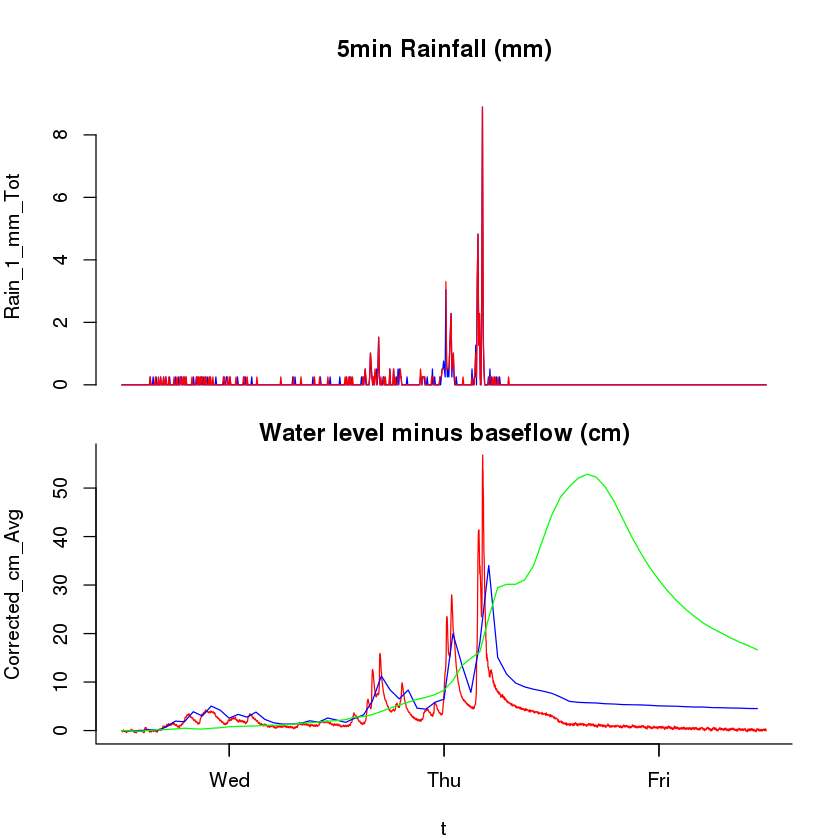

In [3]:
layout(matrix(1:2, ncol = 1))

par(mar = c(1, 4, 4, 2))
with(broadmead_rain1, plot(Rain_1_mm_Tot~t, type = 'l', col='blue', xaxt = 'n', bty="n",main = '5min Rainfall (mm)'))
with(broadmead_rain2, lines(Rain_2_mm_Tot~t, col="red"))

par(mar = c(4, 4, 1, 2))
with((washington_up_level - washington_up_level[1,2]), plot(Corrected_cm_Avg~t, type = 'l', col="red", bty = "l", main = 'Water level minus baseflow (cm)'))
with((washington_down_level - washington_down_level[1,2]),lines(Corrected_cm_Avg~t, col="blue"))
with((washington_lake_level - washington_lake_level[1,2]),lines(Lvl_cm_Avg~t, col="green"))